<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/IC_1805/IC_1805_version_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 7.6MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 2.6MB 43.1MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=aacdfbc07107995b8b726c3db3b7fbd1205cd1dd867e2fdb60f7443751f96280
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around IC1805 center

coordinate = coord.SkyCoord.from_name('IC1805')
print(coordinate)
radius = u.Quantity(0.6, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (38.175, 61.45)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 465528726379405696,465528726379405696,247964031,2015.5,38.177112,0.554648,61.450483,0.609400,1.765231,0.769221,2.294829,-1.217923,0.935301,0.826493,1.208420,0.110764,0.039704,-0.548879,0.208537,-0.306737,0.181764,0.092372,-0.152621,-0.059522,0.098671,272,0,270,2,5.630649,416.011017,2.240920,3.162287e+00,31,False,0.032422,1.050447,0.128913,-0.059176,...,365.432711,12.216329,29.913464,18.354902,3.558765,0,1.338949,-0.524485,1.863434,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726376,0.919658,58.803635,43.504977,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001112
1,1635721458409799680,Gaia DR2 465528722077474176,465528722077474176,532618104,2015.5,38.173126,0.195596,61.448828,0.223026,0.485018,0.273150,1.775644,-1.252496,0.308658,-0.557193,0.520266,0.090727,0.080372,-0.703858,0.043827,-0.001763,0.011196,-0.234885,-0.112208,-0.194637,0.132936,350,0,348,2,2.492240,411.750702,0.597085,1.231175e+00,31,False,0.225304,1.251449,0.045914,-0.025778,...,728.827109,9.462338,77.024002,17.605358,2.025694,0,2.002157,0.570684,1.431473,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.725244,0.917403,58.800282,43.504305,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001479
2,1635721458409799680,Gaia DR2 465528726379405440,465528726379405440,1283651393,2015.5,38.172314,0.423892,61.451231,0.538058,0.062564,0.635088,0.098512,1.224278,0.695127,0.686585,1.155529,-0.032334,0.062870,-0.658227,0.092028,-0.183861,0.026078,0.209751,-0.043140,0.064907,-0.108643,286,0,284,2,4.475788,397.799500,1.678573,2.132602e+00,31,False,0.048033,1.173376,0.107343,-0.088620,...,377.982854,8.946186,42.250725,18.318239,3.174750,0,1.303114,-0.424246,1.727360,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723971,0.919477,58.801227,43.506640,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001785
3,1635721458409799680,Gaia DR2 465528726379405056,465528726379405056,181327803,2015.5,38.178915,0.149113,61.450697,0.164303,0.618628,0.205993,3.003147,-0.576566,0.267372,0.189691,0.370243,0.072195,-0.050279,-0.611804,0.154452,-0.259068,-0.004170,0.083585,0.111078,-0.174088,-0.122973,259,0,256,3,2.311016,305.660400,0.484698,1.279618e+00,31,False,0.446387,1.381541,0.036848,-0.009684,...,1064.630714,24.601653,43.274765,17.193922,1.941268,0,1.815165,0.472721,1.342443,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.727092,0.920184,58.804834,43.504799,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001989
4,1635721458

In [6]:
all_stars[all_stars['parallax_over_error'] > 5]

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
8,1635721458409799680,Gaia DR2 465528726373337088,465528726373337088,1660500550,2015.5,38.175354,0.290478,61.454596,0.394198,4.784557,0.565607,8.459159,-1.618027,0.441524,-3.135104,0.840389,-0.059969,0.282473,-0.657306,-0.112270,-0.356095,0.019607,-0.123048,-0.214755,0.044362,0.129218,128,0,128,0,25.442947,1106.305420,1.788871,37.097147,31,False,0.229808,1.179883,0.074927,0.059227,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.724034,0.923142,58.805035,43.509050,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004600
12,1635721458409799680,Gaia DR2 465528726370386560,465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,4.978108e+04,4011.776907,12.408737,13.019259,2.141917,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723230,0.924154,58.805327,43.510325,102011,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005842
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,4.806036e+04,153.224776,313.659210,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048
14,1635721458409799680,Gaia DR2 465528726379402112,465528726379402112,510287181,2015.5,38.177232,0.063257,61.455989,0.071002,0.465485,0.085514,5.443405,-0.441348,0.096515,-1.487824,0.150428,-0.089893,0.000653,-0.722535,0.157880,-0.002443,0.141679,-0.389349,-0.005071,0.127223,0.010043,383,383,378,5,43.846756,3306.656982,0.334037,39.395666,31,True,7.223352,1.606399,0.013889,-0.070341,...,9.631245e+06,13506.265919,713.094543,7.302714,1.203377,0,0.785742,0.317159,0.468583,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.724333,0.924771,58.806980,43.509920,100001,5858.250000,5819.333496,5935.500000,1.2640,0.9229,1.6664,0.6497,0.4620,0.8

In [7]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 5]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


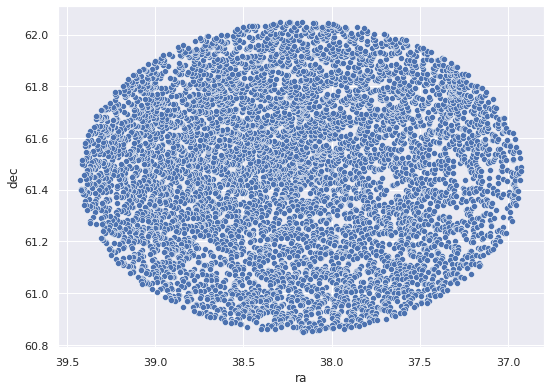

In [8]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()

#### Finding Cantat Data

In [9]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [10]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [11]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [12]:
# help(Vizier)

In [13]:
## saving only IC 1805 data from Cantat

cantat_1805 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="IC_1805")
cantat_1805 = cantat_1805[0].to_pandas()
cantat_1805

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,38.153592,61.130890,465452928793998720,0.3521,-0.476,-0.863,NaN,17.732300,2.5744,0.3,IC_1805,38.153596,61.130894
1,38.148031,61.117989,465452894434262528,0.3413,-1.027,-0.231,NaN,16.749500,1.6401,0.3,IC_1805,38.148040,61.117990
2,38.253198,61.651232,465540335670181504,0.4672,-0.453,-0.891,NaN,17.607300,2.2985,0.4,IC_1805,38.253202,61.651235
3,38.300182,61.354941,465480382225858304,0.3881,-0.664,-0.846,NaN,14.744000,1.1821,1.0,IC_1805,38.300188,61.354945
4,38.429289,61.316453,465479248354610944,0.4768,-0.486,-1.095,NaN,17.565599,1.6560,0.4,IC_1805,38.429293,61.316458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,38.559873,61.603712,465911562577451264,0.4788,-0.142,-0.669,NaN,17.171600,1.6082,0.2,IC_1805,38.559874,61.603715
452,38.242582,61.758806,465917300660039296,0.3388,-1.648,-0.124,NaN,16.572800,1.2593,0.1,IC_1805,38.242597,61.758806
453,38.561836,61.703254,465913310627212672,0.4396,-0.690,-0.448,NaN,13.340600,0.8793,0.8,IC_1805,38.561842,61.703256
454,38.239475,61.768696,465929047388139008,0.3782,-0.733,0.198,NaN,17.888201,1.8055,0.1,IC_1805,38.239482,61.768695


In [14]:
# renaming the cantat table to match it with gaia_data
cantat_1805 = cantat_1805.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [15]:
# taking the subset of only source_id and PMemb
cantat_1805 = cantat_1805.loc[:,['source_id', 'PMemb']]


In [16]:
cantat_1805.isnull().sum()

source_id    0
PMemb        0
dtype: int64

In [17]:
# join the two table on source_id
cantat_1805 = all_stars[all_stars['parallax_over_error'] > 5].join(cantat_1805.set_index('source_id'), on='source_id')

In [18]:
cantat_1805.isnull().sum()

solution_id                0
designation                0
source_id                  0
random_index               0
ref_epoch                  0
                        ... 
lum_percentile_upper    3346
datalink_url               0
epoch_photometry_url       0
dist                       0
PMemb                   6926
Length: 98, dtype: int64

In [19]:
cantat_1805.shape

(7235, 98)

In [20]:
cantat_1805.dropna(subset=['PMemb']).shape

(309, 98)

In [21]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_1805 = cantat_1805.dropna(subset=['PMemb'])
cantat_1805

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
12,1635721458409799680,Gaia DR2 465528726370386560,465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,4011.776907,12.408737,13.019259,2.141917,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723230,0.924154,58.805327,43.510325,102011,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005842,0.3
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,153.224776,313.659210,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048,1.0
16,1635721458409799680,Gaia DR2 465528726379401344,465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,351.628832,2154.513672,10.063335,1.210302,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726980,0.925506,58.810177,43.508449,100002,6109.666504,5640.000000,6873.419922,1.7587,1.5623,2.0748,0.9335,0.7975,1.0714,200111,14.735189,11.642467,17.291494,272.568817,239.666214,305.471405,https://gea.esac.esa.int/data-server/datalink/...,,0.006811,0.8
29,1635721458409799680,Gaia DR2 465528722077526144,465528722077526144,537680023,2015.5,38.181367,0.028767,61.442197,0.030355,0.453761,0.037817,11.998713,-0.542215,0.045610,-0.599020,0.067597,-0.014551,0.115672,-0.686150,0.128594,0.053037,0.100524,-0.214339,-0.124897,-0.041728,0.037988,324,306,315,9,18.035608,1009.378662,0.074506,2.377913,31,False,90.522102,1.565245,0.006710,-0.083890,...,101.218995,1191.624268,12.058416,1.249682,1,1.053280,0.430085,0.623195,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.731412,0.912770,58.801241,43.4966

In [22]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_1805.to_csv('IC_1805_cantat.csv')
# all_stars.to_csv('IC_1805_Gaia_30m.csv')

In [23]:
cantat_1805.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,3.090000e+02,3.090000e+02,3.090000e+02,309.0,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.0,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,3.090000e+02,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,5.000000,5.000000,309.000000,5.0,5.00000,5.000000,309.000000,309.000000,309.000000,309.000000,283.000000,283.000000,283.000000,283.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,309.000000,309.000000
mean,1.635721e+18,4.655536e+17,8.273567e+08,2015.5,38.192704,0.034847,61.479888,0.035954,0.442783,0.046539,11.796295,-0.824484,0.052660,-0.425825,0.079397,-0.016379,0.053593,-0.755385,0.048304,0.031758,0.036003,-0.268322,-0.039095,0.028257,-0.004180,393.750809,49.559871,390.540453,3.210356,0.950654,436.399323,0.047189,0.937856,31.0,55.126675,1.487092,0.007793,-0.044086,44.825243,15.466019,...,15.800396,41.304207,1.165745e+05,173.580252,681.313721,14.352324,1.322847,0.142395,1.448082,0.644162,0.803920,-47.089115,2.876392,0.181230,4750.0,2.60000,0.000000,134.721873,0.949942,58.830487,43.528441,100086.031802,4674.001465,4493.075195,4966.569824,2.150878,1.833521,2.514531,1.085548,0.911814,1.276234,200111.0,5.422986,4.849247,5.841270,54.233978,47.036800,61.431141,0.170618,0.474434
std,0.000000e+00,9.969951e+13,4.872798e+08,0.0,0.293296,0.016804,0.131162,0.016113,0.051812,0.021744,5.654527,0.308267,0.025830,0.355623,0.035289,0.106084,0.116794,0.033217,0.086498,0.088453,0.085628,0.133586,0.085376,0.088001,0.087112,39.731396,129.437998,39.576030,5.280240,5.805500,227.093567,0.088696,3.076893,0.0,99.228325,0.082364,0.003642,0.032757,4.419762,1.082465,...,2.007061,5.972177,6.847101e+05,1010.677324,441.733734,1.707233,0.092681,0.350021,0.429572,0.250527,0.191531,16.629325,1.743476,1.518128,500.0,0.74162,0.176777,0.132360,0.139007,0.200547,0.125231,404.048829,660.873291,644.741760,691.042969,0.557472,0.552263,0.464318,0.279791,0.275184,0.231813,0.0,6.843469,6.323979,7.256820,279.222290,242.473190,316.016998,0.092830,0.324578
min,1.635721e+18,4.654750e+17,1.440812e+07,2015.5,37.509657,0.012867,61.125531,0.013695,0.330794,0.016679,5.013821,-1.728594,0.019533,-1.281146,0.029553,-0.491299,-0.287339,-0.877849,-0.230253,-0.201980,-0.206680,-0.651846,-0.306789,-0.226258,-0.366241,177.000000,0.000000,167.000000,0.000000,-10.7

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


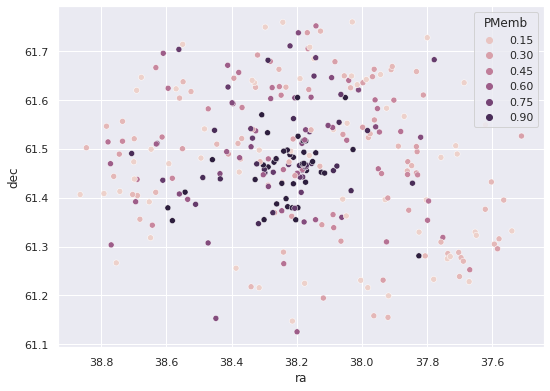

In [24]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_1805['ra'], cantat_1805['dec'], hue = cantat_1805['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [25]:
# import member dataset
member = cantat_1805[cantat_1805['PMemb'] >= 0.5].copy()

In [26]:
### adding their distance from the center of the clusters

## IC 1805
center = coord.SkyCoord.from_name('IC1805')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_1805_center'] = distance

In [27]:
# member['PMemb'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb,dist_1805_center
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,313.659210,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048,1.0,0.006043
16,1635721458409799680,Gaia DR2 465528726379401344,465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,2154.513672,10.063335,1.210302,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726980,0.925506,58.810177,43.508449,100002,6109.666504,5640.000000,6873.419922,1.7587,1.5623,2.0748,0.9335,0.7975,1.0714,200111,14.735189,11.642467,17.291494,272.568817,239.666214,305.471405,https://gea.esac.esa.int/data-server/datalink/...,,0.006811,0.8,0.006815
29,1635721458409799680,Gaia DR2 465528722077526144,465528722077526144,537680023,2015.5,38.181367,0.028767,61.442197,0.030355,0.453761,0.037817,11.998713,-0.542215,0.045610,-0.599020,0.067597,-0.014551,0.115672,-0.686150,0.128594,0.053037,0.100524,-0.214339,-0.124897,-0.041728,0.037988,324,306,315,9,18.035608,1009.378662,0.074506,2.377913,31,False,90.522102,1.565245,0.006710,-0.083890,...,1191.624268,12.058416,1.249682,1,1.053280,0.430085,0.623195,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.731412,0.912770,58.801241,43.496624,100002,5114.365234,5047.864746,5224.460449,NaN,NaN,NaN,NaN,NaN,NaN,200111,7.318390,7.013199,7.512485,33.013596,28.850819,37.176373,https://gea.esac.esa.int/data-server/datalink/...,,0.008371,0.8,0.008376
30,1635721458409799680,Gaia DR2 465534597594544896,465534597594544896,1322311129,2015.5,38.182178,0.083930,61.457767,0.066217,0.449248,0.082034,5.476370,-1.024102,0.127288,-0.598653,0.133927,-0.060697,-0.011486,-0.727074,0.155960,0.055855,0.311931,0.203402,-0.034289,0.098347,0.208903,214,0,210,4,4.609203,312.325348,0.313766,3.483956,31,False,3.540692,1.368919,0.015488,-0.200094,...,60.156487,15.141042,1.597403,0,1.785983,0.662420,1.123563,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.725842,0.927315,58.810976,4

In [28]:
### adding their distance from the center of the clusters

## IC 1805
center = coord.SkyCoord.from_name('IC1805')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_1805_center'] = distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


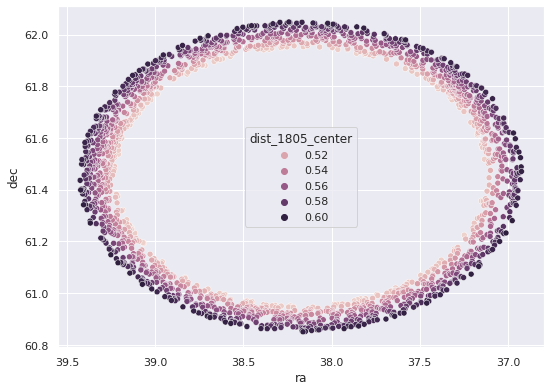

In [29]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_1805_center', 
                          data = all_stars_filtered[all_stars_filtered.dist_1805_center >= 0.5])
skyplot.invert_xaxis()

In [30]:
non_member = all_stars_filtered[all_stars_filtered['dist_1805_center'] >= 0.5].sample(len(member))

In [31]:
non_member['PMemb'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_1805_center,PMemb
58567,1635721458409799680,Gaia DR2 465854422337293056,465854422337293056,1175080153,2015.5,39.354154,0.018029,61.509045,0.018930,0.393476,0.023787,16.541443,1.210145,0.027544,-1.785332,0.042281,0.163087,0.112420,-0.723407,-0.058332,0.014033,-0.107546,-0.219856,-0.054523,0.205480,0.134767,397,0,397,0,-3.962231,290.648132,0.0,0.000000e+00,31,False,31.285730,1.498313,0.004296,-0.027983,...,1003.889526,13.919845,1.283252,0,1.386317,0.614761,0.771556,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,135.221441,1.192167,59.537632,43.317990,100001,4905.250000,4583.002441,5080.064941,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.718090,3.466599,4.259337,7.210728,6.086139,8.335318,https://gea.esac.esa.int/data-server/datalink/...,,0.566086,0.565571,0
57754,1635721458409799680,Gaia DR2 513598756266062848,513598756266062848,1291182752,2015.5,37.638338,0.023621,61.951016,0.026211,1.230962,0.035012,35.158447,2.401502,0.039397,1.559583,0.057877,-0.114751,0.115871,-0.739156,-0.099241,0.004618,-0.004391,-0.572909,-0.096963,0.074519,0.024555,556,0,555,1,-2.880239,459.305634,0.0,1.713894e-15,31,False,12.880614,1.502615,0.005251,-0.022424,...,876.345520,14.822145,1.274594,0,1.399604,0.631107,0.768497,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.301075,1.287020,58.786442,44.066772,100001,4540.560059,4413.000000,4842.000000,1.0443,0.8240,1.1830,0.5040,0.3512,0.5850,200111,0.970025,0.853006,1.026913,0.360328,0.336321,0.384335,https://gea.esac.esa.int/data-server/datalink/...,,0.561914,0.560981,0
55589,1635721458409799680,Gaia DR2 465443995262091008,465443995262091008,1069996769,2015.5,37.874066,0.015679,60.919616,0.015683,1.042664,0.019840,52.554111,1.741301,0.021335,-10.229369,0.035550,0.245904,0.159485,-0.844288,-0.097121,-0.023830,-0.187597,-0.142891,-0.148079,0.112970,0.167044,446,0,446,0,-6.716240,269.617981,0.0,0.000000e+00,31,False,109.968773,1.496353,0.003029,-0.033970,...,1716.848389,12.588260,1.267680,0,1.371793,0.618225,0.753568,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.792111,0.373003,58.308469,43.088712,100001,4733.404785,4423.009766,5045.750000,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.872067,2.527496,3.289320,3.730599,3.537200,3.923997,https://gea.esac.esa.int/data-server/datalink/...,,0.549859,0.550183,0
64414,1635721458409799680,Gaia DR2 465851879716641280,465851879716641280,832722031,2015.5,39.415811,0.026692,61.516366,0.028240,0.246610,0.035472,6.952298,0.618096,0.041076,-0.414159,0.063124,0.170261,0.106298,-0.716072,-0.061380,0.001088,-0.104244,-0.216234,-0.055231,0.226134,0.161669,397,0,395,2,-0.962059,363.107422,0.0,2.035321e-15,31,False,11.507006,1.570292,0.006523,-0.019400,...,511.750122,15.046639,1.262527,0,1.087590,0.439877,0.647714,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,135.245520,1.210576,59.578517,43.312200,100

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


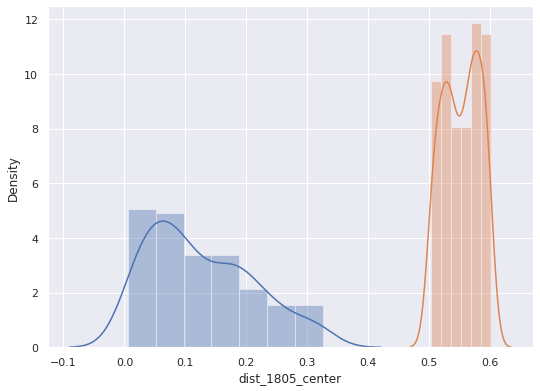

In [32]:
sns.distplot(member['dist_1805_center'])
sns.distplot(non_member['dist_1805_center'])

In [33]:
training_data = pd.concat([member, non_member])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


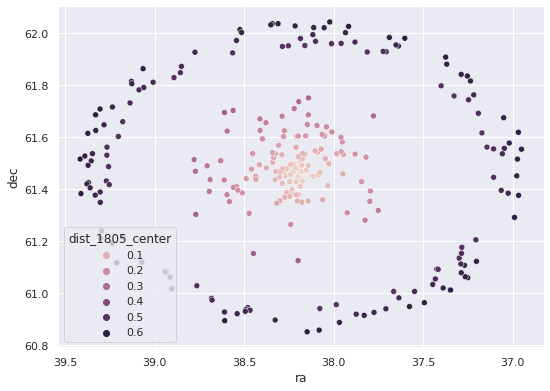

In [34]:
skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_1805_center', 
                          data = training_data)
skyplot.invert_xaxis()

In [35]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_1805_center
count,2.860000e+02,2.860000e+02,2.860000e+02,286.0,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.0,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.000000,2.860000e+02,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,6.000000,6.000000,286.000000,6.000000,6.000000,6.000000,286.000000,286.000000,286.000000,286.000000,228.000000,228.000000,228.000000,228.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,196.0,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,286.000000,286.000000,286.000000
mean,1.635721e+18,4.718182e+17,8.840707e+08,2015.5,38.213720,0.043887,61.480001,0.045261,0.763313,0.059990,17.601259,0.327179,0.066828,-1.289015,0.101239,0.013141,0.060021,-0.754689,-0.003426,0.008555,-0.004848,-0.268473,-0.045036,0.082184,0.034702,422.888112,52.660839,419.342657,3.545455,1.077177,490.491150,0.086801,1.377822,31.0,56.260937,1.470878,0.009852,-0.038606,48.157343,15.597902,...,44.293706,1.207316e+05,164.281516,723.588562,14.447564,1.343917,0.129371,1.542951,0.704332,0.838618,-45.990978,3.094875,0.346154,5500.000000,3.583333,0.041667,134.730682,0.954777,58.843616,43.524616,100045.065789,4714.373047,4545.124023,4983.260254,1.843896,1.543372,2.161026,0.929941,0.769206,1.095471,200111.0,4.857098,4.423514,5.212311,52.544781,45.914398,59.175117,0.339514,0.393706,0.339489
std,0.000000e+00,1.614347e+16,4.914333e+08,0.0,0.602360,0.040238,0.285230,0.042062,0.632007,0.056511,15.691470,4.767368,0.062520,3.951760,0.095052,0.125415,0.102138,0.043197,0.107532,0.098703,0.093115,0.164565,0.081702,0.114974,0.100202,60.714414,138.658891,60.583143,5.757957,7.306069,535.885193,0.198336,7.061702,0.0,98.200493,0.099416,0.009622,0.029250,6.900272,1.003081,...,8.013876,7.080756e+05,1017.485141,494.693848,1.902170,0.147946,0.336198,0.547917,0.333918,0.236929,14.904288,3.398880,2.698102,707.106812,0.801041,0.102062,0.282431,0.290480,0.403447,0.280160,293.853390,673.997314,652.985046,691.645203,0.644583,0.613515,0.687295,0.328629,0.308319,0.353073,0.0,6.755019,6.408255,7.152618,290.849915,252.920975,328.800293,0.223096,0.414766,0.223078
min,1.635721e+18,4.652773e+17,1.440812e+07,2015.5,36.951209,0.012867,60.851725,0.012790,0.217420,0.016679,5.013821,-25.077163,0.019533,-27.437410,0.029553,-0.491299,-0.242131,-0.877849,-0.229311,-0.322079,-0.253227,-0.651846,-0.206137,-0.160690,-0.366241,214.000000,0.000000,210.00

In [36]:
# correlation of PMemb with other variables
training_data.corr().PMemb.dropna().sort_values()

dist_1805_center               -0.947944
dist                           -0.947937
rv_template_teff               -0.692820
rv_template_logg               -0.662541
parallax_pmdec_corr            -0.632628
                                  ...   
e_bp_min_rp_percentile_upper    0.466338
dec_pmra_corr                   0.534490
ra_pmdec_corr                   0.714504
PMemb                           1.000000
rv_template_fe_h                1.000000
Name: PMemb, Length: 90, dtype: float64

In [37]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['PMemb']

In [38]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,286.000000,286.000000,286.000000
mean,0.763313,0.327179,-1.289014
std,0.632007,4.767368,3.951759
min,0.217420,-25.077164,-27.437410
25%,0.437030,-0.863389,-1.095781
50%,0.483716,-0.668476,-0.700571
75%,0.851011,0.583777,-0.446184
max,5.906433,27.156773,30.445768


In [39]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


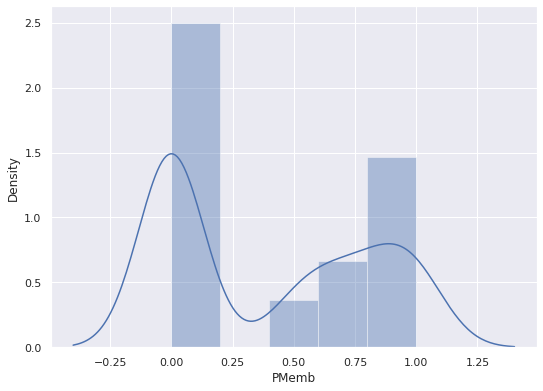

In [40]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [41]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

143

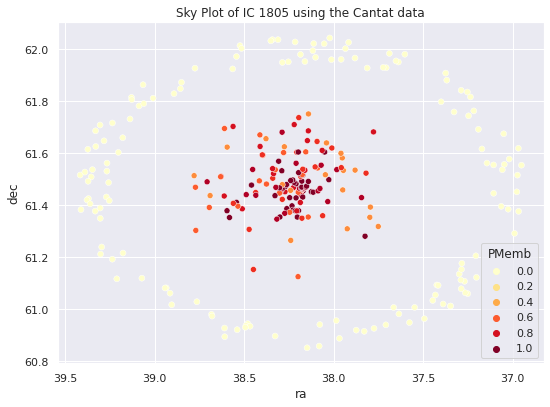

In [42]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'PMemb', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of IC 1805 using the Cantat data')
plt.show()

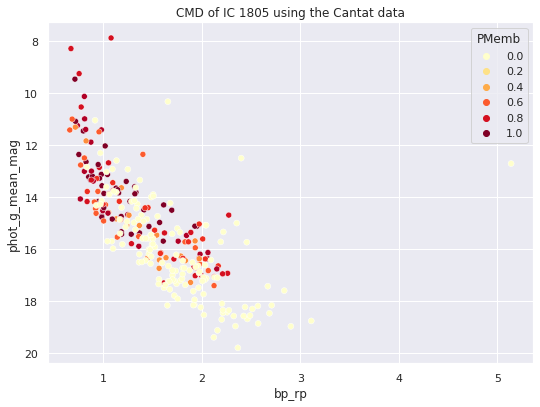

In [43]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
cmd.invert_yaxis()
plt.title('CMD of IC 1805 using the Cantat data')
plt.show()

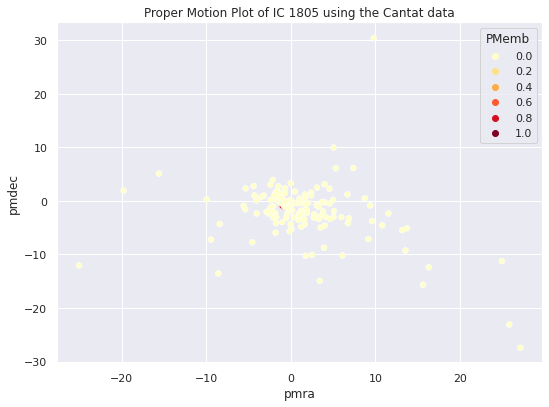

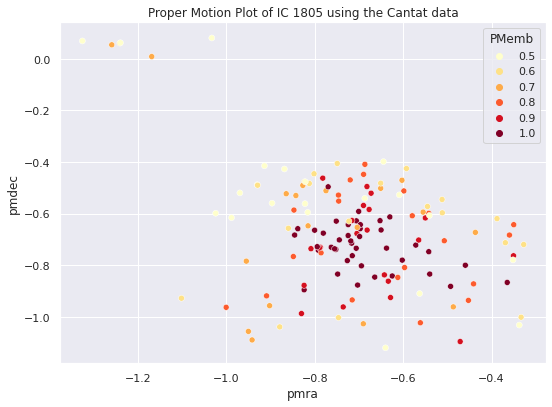

In [44]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of IC 1805 using the Cantat data')
plt.show()
pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = member)
plt.title('Proper Motion Plot of IC 1805 using the Cantat data')
plt.show()

In [45]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

parallax    0.680792
pmdec       0.235771
pmra        0.083436
dtype: float64

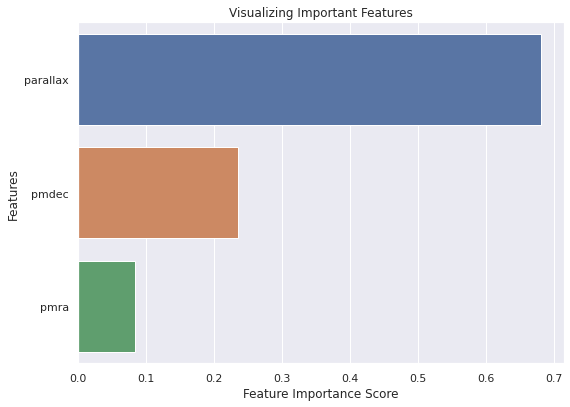

In [47]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [48]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [49]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [50]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.904862593479777

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


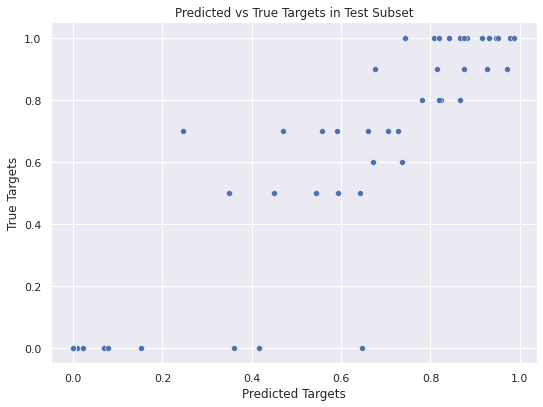

In [52]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [53]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [54]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.5883220781425113, 0.742999969637687, 0.7811356236165208, 0.7946916962664688, 0.8069240889246174, 0.8048486173622493, 0.8319491389023816, 0.8355605851541483, 0.858379744693978, 0.8596433540027251, 0.8807002515884538, 0.8634856039613534, 0.8810025205780185, 0.8713481702791563, 0.8654637698788183, 0.872912681753653, 0.8502737801322418, 0.885633799534107, 0.866969190962607]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


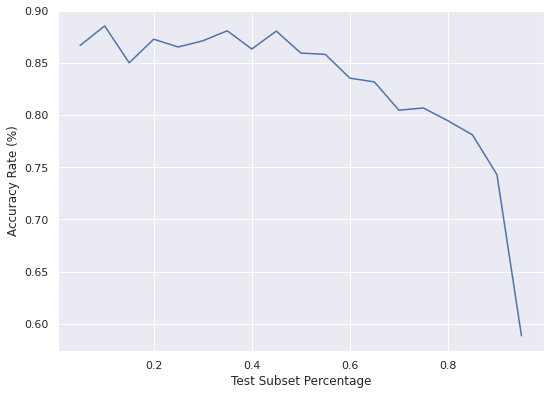

In [55]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [56]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_1805_center
count,7.235000e+03,7.235000e+03,7.235000e+03,7235.0,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7.235000e+03,7235.0,7235.000000,7234.000000,7234.000000,7235.000000,7235.000000,7235.000000,...,7193.000000,7235.000000,7.193000e+03,7193.000000,7193.000000,7193.000000,7193.000000,7235.000000,7193.000000,7193.000000,7193.000000,258.000000,258.000000,7235.000000,258.000000,258.000000,258.000000,7235.000000,7235.000000,7235.000000,7235.000000,4858.000000,4858.000000,4858.000000,4858.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,3889.0,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,7235.000000,7235.000000
mean,1.635721e+18,4.710731e+17,8.490684e+08,2015.5,38.234069,0.069344,61.466724,0.070395,1.076295,0.095315,17.547956,1.476574,0.106758,-2.060181,0.158137,0.024561,0.041111,-0.751727,-0.033464,-0.028082,-0.024196,-0.238398,-0.030551,0.114896,0.055267,420.438010,18.374015,417.682101,2.755909,3.822416,962.897034,0.222175,1.321747e+01,31.0,21.216928,1.427235,0.015332,-0.033983,47.908915,15.533103,...,17.087580,43.728680,4.018367e+04,65.743234,573.488281,15.340632,1.399819,0.091914,1.746929,0.801396,0.945535,-27.238912,1.706078,0.550657,5258.720703,3.472868,-0.063953,134.744833,0.946259,58.847979,43.508412,100053.058254,4406.255859,4235.801758,4701.469727,1.636582,1.362499,1.936936,0.817958,0.676363,0.973017,200111.0,3.111452,2.720064,3.363122,10.577373,9.007964,12.146854,0.389511,0.389453
std,0.000000e+00,1.521712e+16,4.908142e+08,0.0,0.603040,0.088600,0.298323,0.089474,1.149362,0.121590,24.326473,8.407149,0.140060,6.762113,0.208486,0.126287,0.127551,0.050930,0.096797,0.095453,0.085793,0.167675,0.094605,0.110973,0.094831,60.119896,85.350054,59.918202,4.119063,16.470339,7070.418457,0.623399,1.683310e+02,0.0,56.793392,0.089122,0.019132,0.032319,6.836482,1.178136,...,1.842195,8.287984,3.515418e+05,774.577671,422.542145,1.588089,0.212103,0.300188,0.434249,0.269247,0.212872,31.063894,2.295877,3.104978,716.448975,0.632486,0.305238,0.289106,0.297309,0.400407,0.295980,318.294058,497.617218,497.619263,505.148499,0.724856,0.709191,0.748820,0.367315,0.356283,0.383090,0.0,4.545385,3.987911,4.908094,94.363480,80.421616,108.488144,0.146059,0.146020
min,1.635721e+18,4.652752e+17,5.895700e+04,2015.5,36.923003,0.012176,60.850139,0.011563,0.126837,0.016679,5.000302,-49.057160,0.017901,-159.179629,0.026448,-0.688963,-0.505424

In [57]:
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)

In [58]:
# select the set of predictor variables from the new dataset
new_features = all_stars_filtered.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [59]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
# estimate the membership probability of the stars
all_stars_filtered['PMemb'] = rfr.predict(new_features)
sum(all_stars_filtered['PMemb'] >= 0.5)

326

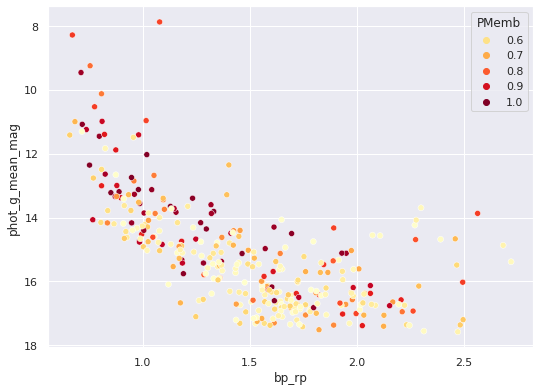

In [61]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
cmd.invert_yaxis()

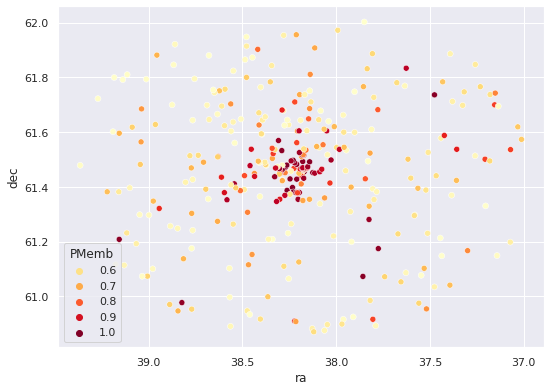

In [62]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

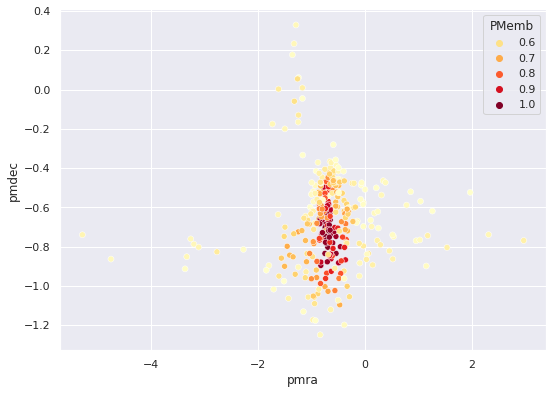

In [63]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )

In [64]:
potentialMember = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5]
len(potentialMember)

326

In [65]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_1805_center,PMemb
count,3.260000e+02,3.260000e+02,3.260000e+02,326.0,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.0,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,326.000000,3.260000e+02,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,2.000000,2.000000,326.000000,2.0,2.000000,2.000000,326.000000,326.000000,326.000000,326.000000,297.000000,297.000000,297.000000,297.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,233.0,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,326.000000,326.000000,326.000000
mean,1.635721e+18,4.694148e+17,8.695776e+08,2015.5,38.214975,0.034035,61.459424,0.034795,0.445096,0.045960,12.080327,-0.678316,0.051248,-0.667463,0.077791,0.009340,0.056917,-0.759740,0.005040,0.015631,0.002449,-0.272381,-0.043271,0.069914,0.030893,413.711656,35.619632,410.466258,3.245399,0.894397,454.626770,0.048008,1.174493,31.0,47.093987,1.481655,0.007478,-0.040876,47.113497,15.549080,...,43.521472,1.017093e+05,147.681794,710.090698,14.399179,1.324918,0.131902,1.485364,0.669021,0.816342,-50.480706,3.614465,0.055215,4500.0,2.750000,0.125000,134.739365,0.935625,58.832043,43.505577,100068.552189,4619.415039,4442.626465,4904.151367,2.218586,1.888531,2.608344,1.118611,0.944101,1.317261,200111.0,5.051119,4.498495,5.470726,46.024105,40.066525,51.981689,0.288859,0.288835,0.679696
std,0.000000e+00,1.302746e+16,4.883863e+08,0.0,0.491458,0.016594,0.249396,0.015710,0.046406,0.021869,5.723952,0.758717,0.025277,0.228383,0.035547,0.112442,0.117463,0.036661,0.105199,0.094130,0.087987,0.138877,0.087813,0.106160,0.097910,52.237590,112.187739,52.382590,5.286374,5.709326,220.353165,0.092099,3.771430,0.0,89.520660,0.082988,0.003554,0.030822,5.892577,1.050589,...,6.519403,6.607602e+05,952.816319,433.039520,1.584463,0.092631,0.338904,0.442807,0.262395,0.191798,13.506242,0.524597,0.721123,0.0,0.353553,0.176777,0.237057,0.247272,0.327424,0.246831,361.719539,652.762573,644.690735,676.071899,0.504369,0.511518,0.435020,0.255764,0.254263,0.226557,0.0,5.981567,5.617172,6.385772,267.174347,232.351013,302.017700,0.184663,0.184647,0.162995
min,1.635721e+18,4.652775e+17,4.442620e+05,2015.5,37.012168,0.012574,60.870445,0.013377,0.330794,0.016679,5.013821,-5.277661,0.017901,-1.248575,0.029524,-0.491299,-0.365978,-0.877849,-0.256110,-0.248380,-0.204082,-0.651846,-0.227334,-0.160690,-0.366241,214.000000,0.000000,210.000000,0.000000,-10.7496

In [66]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_1805_center
count,1.430000e+02,1.430000e+02,1.430000e+02,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,1.000000,1.000000,143.000000,1.0,1.0,1.00,143.000000,143.000000,143.000000,143.000000,139.000000,139.000000,139.000000,139.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,119.0,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,143.000000,143.000000,143.000000
mean,1.635721e+18,4.655446e+17,8.482813e+08,2015.5,38.242048,0.028300,61.483536,0.029696,0.449129,0.037320,14.553250,-0.714546,0.042464,-0.666654,0.064779,-0.018130,0.067223,-0.758784,0.073055,0.053787,0.046692,-0.301932,-0.045787,0.009653,-0.018341,392.097902,75.419580,387.818182,4.279720,0.628407,429.124084,0.038245,7.639714e-01,31.0,84.812599,1.511231,0.006248,-0.046261,44.615385,15.440559,...,41.132867,2.110362e+05,270.057540,812.063232,13.637658,1.301831,0.195804,1.326416,0.581755,0.744660,-40.930351,3.985411,0.048951,4500.0,2.5,0.25,134.742415,0.962190,58.861993,43.521490,100073.215827,4853.942871,4671.197754,5116.779785,2.152269,1.805953,2.507053,1.089597,0.907247,1.275078,200111.0,6.099223,5.587337,6.566247,82.720795,72.356682,93.084930,0.126274,0.787413,0.126263
std,0.000000e+00,8.149801e+13,5.028664e+08,0.0,0.209197,0.014622,0.106388,0.014276,0.042094,0.018580,5.786011,0.190158,0.022319,0.228515,0.030534,0.101233,0.106876,0.031819,0.082157,0.086502,0.086413,0.115940,0.077275,0.076212,0.087657,37.895764,155.085956,37.389205,7.278567,6.487333,222.412857,0.087180,2.719237e+00,0.0,117.900375,0.087893,0.003131,0.031360,4.170525,1.065611,...,5.934190,9.875924e+05,1387.120316,494.328674,1.771524,0.088579,0.398213,0.453022,0.254233,0.206345,NaN,NaN,0.585369,NaN,NaN,NaN,0.102941,0.103461,0.136294,0.107368,374.158239,729.265930,713.611084,754.129700,0.496449,0.492775,0.437773,0.249158,0.242499,0.227097,0.0,7.836180,7.485698,8.299274,370.523499,322.176117,418.896973,0.086125,0.181879,0.086113
min,1.635721e+18,4.654750e+17,1.440812e+07,2015.5,37.751046,0.012867,61.125531,0.013695,0.337474,0.016679,5.013821,-1.325581,0.019533,-1.120267,0.029553,-0.491299,-0.242131,-0.877849,-0.171317,-0.201980,-0.169811,-0.651846,-0.206137,-0.160690,-0.366241,214.000000,0.000000,210.000000,0.000000,-10.749668,159.857651,0.000000,0.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


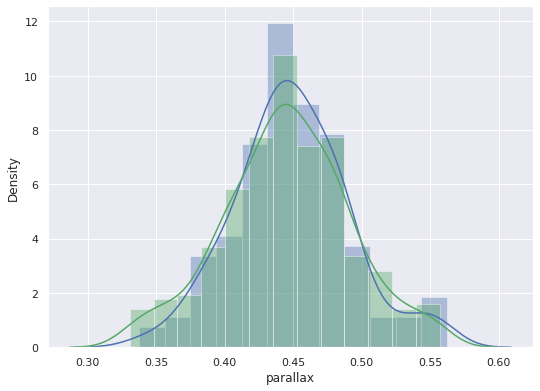

In [67]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


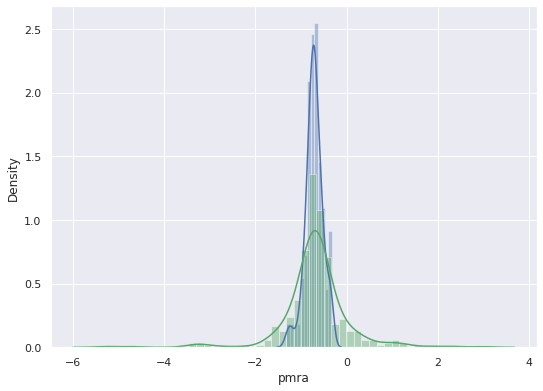

In [68]:
sns.distplot(member['pmra'], color = 'b')
sns.distplot(potentialMember['pmra'], color = 'g')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


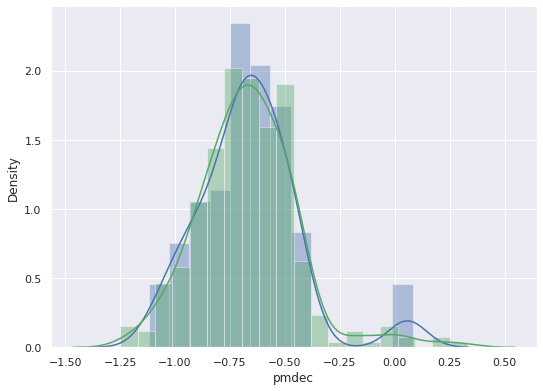

In [69]:
sns.distplot(member['pmdec'], color = 'b')
sns.distplot(potentialMember['pmdec'], color = 'g')

In [70]:
# saving the files as csv
# all_stars.to_csv('gaia_1805_membership_prob.csv')

potentialMember.to_csv('IC_1805_membership_prob.csv')


### Comparing the new and old probable members

In [71]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [72]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_1805_center,PMemb,dataset
12,1635721458409799680,Gaia DR2 465528726370386560,465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,13.019259,2.141917,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723230,0.924154,58.805327,43.510325,102011,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005842,0.005841,0.585,New_member
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048,0.006043,0.997,New_member
16,1635721458409799680,Gaia DR2 465528726379401344,465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,10.063335,1.210302,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726980,0.925506,58.810177,43.508449,100002,6109.666504,5640.000000,6873.419922,1.7587,1.5623,2.0748,0.9335,0.7975,1.0714,200111,14.735189,11.642467,17.291494,272.568817,239.666214,305.471405,https://gea.esac.esa.int/data-server/datalink/...,,0.006811,0.006815,0.833,New_member
29,1635721458409799680,Gaia DR2 465528722077526144,465528722077526144,537680023,2015.5,38.181367,0.028767,61.442197,0.030355,0.453761,0.037817,11.998713,-0.542215,0.045610,-0.599020,0.067597,-0.014551,0.115672,-0.686150,0.128594,0.053037,0.100524,-0.214339,-0.124897,-0.041728,0.037988,324,306,315,9,18.035608,1009.378662,0.074506,2.377913,31,False,90.522102,1.565245,0.006710,-0.083890,...,12.058416,1.249682,1,1.053280,0.430085,0.623195,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.731412,0.912770,58.801241,43.496624,100002,5114.365234,5047.864746,5224.460449,NaN,Na

In [73]:
concatenated.dataset.value_counts()

New_member    326
Old_member    143
Name: dataset, dtype: int64

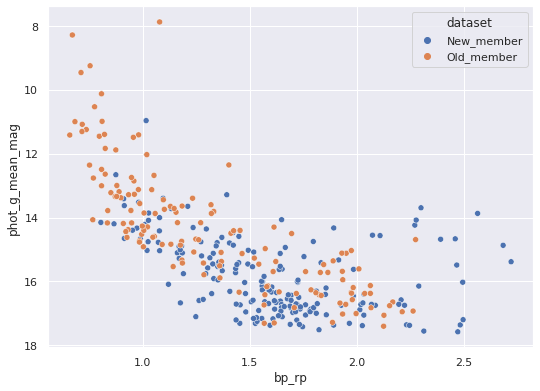

In [74]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

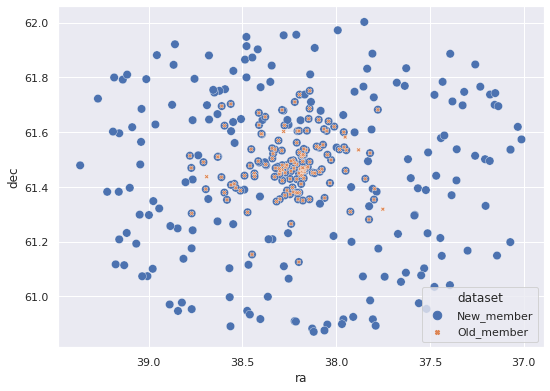

In [75]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='dataset', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

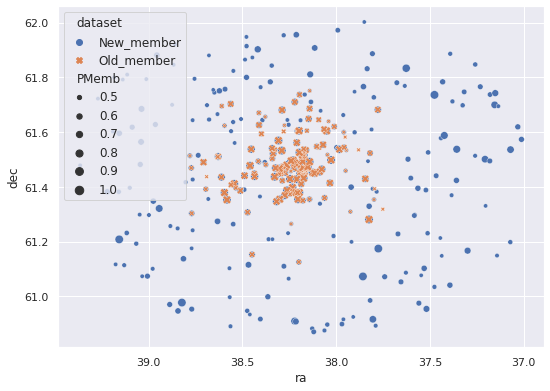

In [76]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

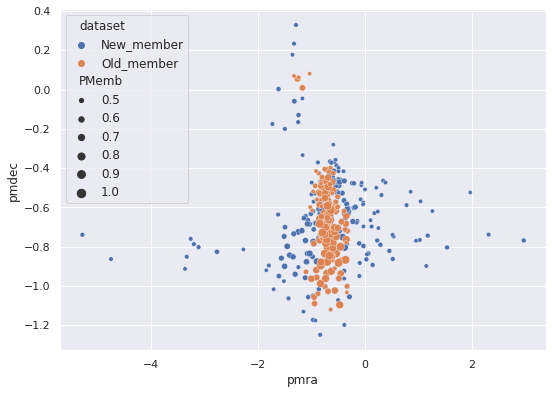

In [77]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [78]:
# pd_prof.ProfileReport(potentialMember)

In [79]:
#files.download('IC_1805_cantat.csv')

#files.download('IC_1805_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


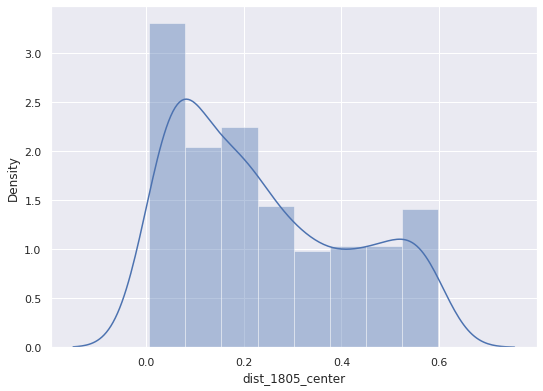

In [80]:
sns.distplot(concatenated['dist_1805_center'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


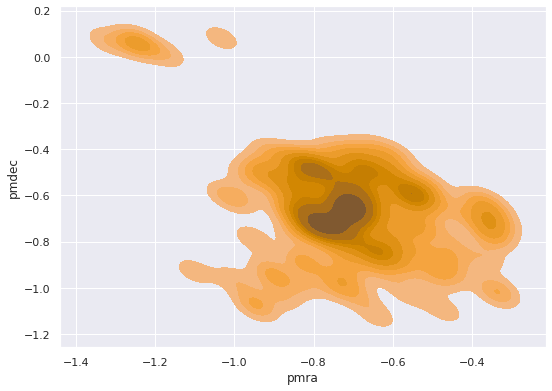

In [81]:
sns.kdeplot('pmra', 'pmdec', data = member, shade=True, color = 'orange', bw = 0.20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


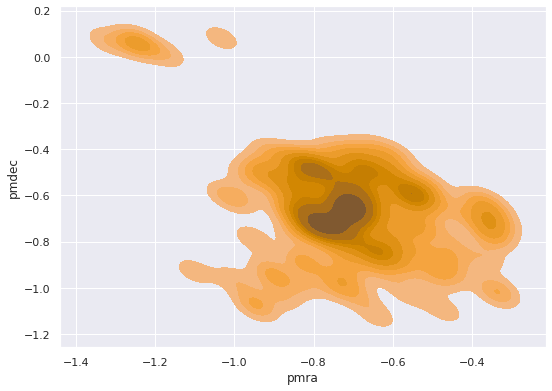

In [82]:
sns.kdeplot('pmra', 'pmdec', data = cantat_1805[cantat_1805['PMemb'] >= 0.5], shade=True, color = 'orange', bw = 0.20)

In [83]:
len(cantat_1805[cantat_1805['PMemb'] >= 0.5])

143

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


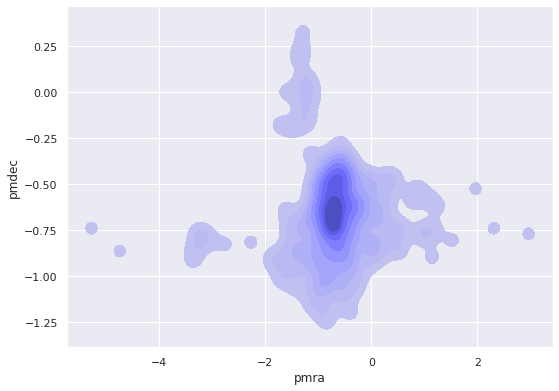

In [84]:
sns.kdeplot('pmra', 'pmdec', data = potentialMember, shade=True, color = 'blue', bw = 0.20)

In [85]:
potentialMember['radial_velocity'].dropna()

3012   -40.930351
7781   -60.031062
Name: radial_velocity, dtype: float64

In [86]:
member['radial_velocity'].dropna()

3012   -40.930351
Name: radial_velocity, dtype: float64

In [87]:
member['radial_velocity_error'].dropna()

3012    3.985411
Name: radial_velocity_error, dtype: float64